In [2]:
# import the required libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set(style="whitegrid")

# load the dataset
car_data = pd.read_csv("car_sales_data.csv")
print(car_data.head())


  Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0         Ford      Fiesta          1.0    Petrol                 2002   
1      Porsche  718 Cayman          4.0    Petrol                 2016   
2         Ford      Mondeo          1.6    Diesel                 2014   
3       Toyota        RAV4          1.8    Hybrid                 1988   
4           VW        Polo          1.0    Petrol                 2006   

   Mileage  Price  
0   127300   3074  
1    57850  49704  
2    39190  24072  
3   210814   1705  
4   127869   4101  


# Data inspection

In [3]:
car_data.info()

row_count = car_data.shape[0]
print(f"Total number of rows: {row_count}")


col_count = car_data.shape[1]
print(f"Total number of columns: {col_count}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB
Total number of rows: 50000
Total number of columns: 7


### The dataset has 50000 rows and 7 columns 
columns include 
**Manufacturer** - this is the name of manufacturing company
**Model** - categorical data
**Engine Size** - interger
**Fuel type** - 
**Year of manufacture** -
**Mileage**
**Price**



# Data Manipulation
### convert year to date data type


In [4]:
car_data["Year of manufacture"]= pd.to_datetime(car_data["Year of manufacture"], format="%Y")

In [5]:
def missing_values_table(df):
    """
    Returns a summary of missing values in a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to check.
    
    Returns:
    pd.DataFrame: Table with count and percentage of missing values per column.
    """
    # Total missing values per column
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Combine into a DataFrame
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename columns
    mis_val_table = mis_val_table.rename(
        columns = {0: 'Missing Values', 1: '% of Total Values'}
    )
    
    # Filter out columns with no missing values
    mis_val_table = mis_val_table[mis_val_table['Missing Values'] > 0]
    
    # Sort by % of missing values (descending)
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)
    
    return mis_val_table

print(missing_values_table(car_data))

Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


### The dataset is clean and has no missing values

In [6]:
for col in car_data.select_dtypes(include=['object']).columns:
    print(f"Column: {col}")
    print(car_data[col].value_counts())
    print("\n")

Column: Manufacturer
Manufacturer
Ford       14959
VW         14913
Toyota     12554
BMW         4965
Porsche     2609
Name: count, dtype: int64


Column: Model
Model
Mondeo        5058
Golf          5050
Polo          4992
Focus         4976
Fiesta        4925
Passat        4871
RAV4          4292
Prius         4171
Yaris         4091
Z4            1688
M5            1645
X3            1632
911            872
Cayenne        870
718 Cayman     867
Name: count, dtype: int64


Column: Fuel type
Fuel type
Petrol    25488
Diesel    13268
Hybrid    11244
Name: count, dtype: int64




In [7]:
pd.crosstab(car_data["Manufacturer"], car_data["Model"], margins=True)

Model,718 Cayman,911,Cayenne,Fiesta,Focus,Golf,M5,Mondeo,Passat,Polo,Prius,RAV4,X3,Yaris,Z4,All
Manufacturer,,,,,,,,,,,,,,,,
BMW,0,0,0,0,0,0,1645,0,0,0,0,0,1632,0,1688,4965
Ford,0,0,0,4925,4976,0,0,5058,0,0,0,0,0,0,0,14959
Porsche,867,872,870,0,0,0,0,0,0,0,0,0,0,0,0,2609
Toyota,0,0,0,0,0,0,0,0,0,0,4171,4292,0,4091,0,12554
VW,0,0,0,0,0,5050,0,0,4871,4992,0,0,0,0,0,14913
All,867,872,870,4925,4976,5050,1645,5058,4871,4992,4171,4292,1632,4091,1688,50000


In [8]:
pd.crosstab(car_data["Manufacturer"], car_data["Fuel type"], margins=True)

Fuel type,Diesel,Hybrid,Petrol,All
Manufacturer,,,,
BMW,1275,0,3690,4965
Ford,5825,1013,8121,14959
Porsche,276,0,2333,2609
Toyota,0,9718,2836,12554
VW,5892,513,8508,14913
All,13268,11244,25488,50000


In [9]:
pd.crosstab(car_data["Model"], car_data["Fuel type"], margins=True)

Fuel type,Diesel,Hybrid,Petrol,All
Model,,,,
718 Cayman,0,0,867,867
911,0,0,872,872
Cayenne,276,0,594,870
Fiesta,260,258,4407,4925
Focus,1518,253,3205,4976
Golf,1535,513,3002,5050
M5,0,0,1645,1645
Mondeo,4047,502,509,5058
Passat,3878,0,993,4871


### Number of cars sold from different manufacturers

In [10]:
Car_sold_by_manufacturer = car_data["Manufacturer"].value_counts().sort_values(ascending=True)
print(Car_sold_by_manufacturer)

Manufacturer
Porsche     2609
BMW         4965
Toyota     12554
VW         14913
Ford       14959
Name: count, dtype: int64


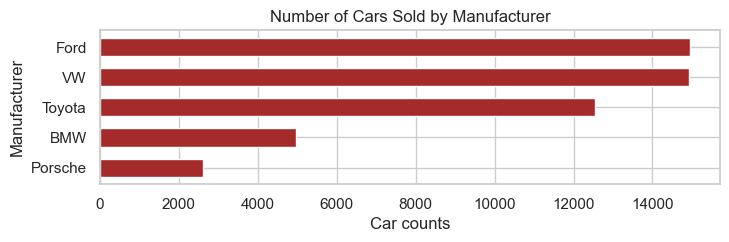

In [11]:
Car_sold_by_manufacturer.plot(kind='barh', figsize=(8, 2), color = 'brown', width = 0.6)
plt.title("Number of Cars Sold by Manufacturer")
plt.xlabel("Car counts")
plt.ylabel("Manufacturer")
plt.show()

### Manufacturers search as Ford and VW sold the Highest number of cars of over 14000 cars each, 
**Porsche** sold the least number of over 2000 cars  followed by BMW which realised a sale more than 4000 cars.


# The most sold Car Model

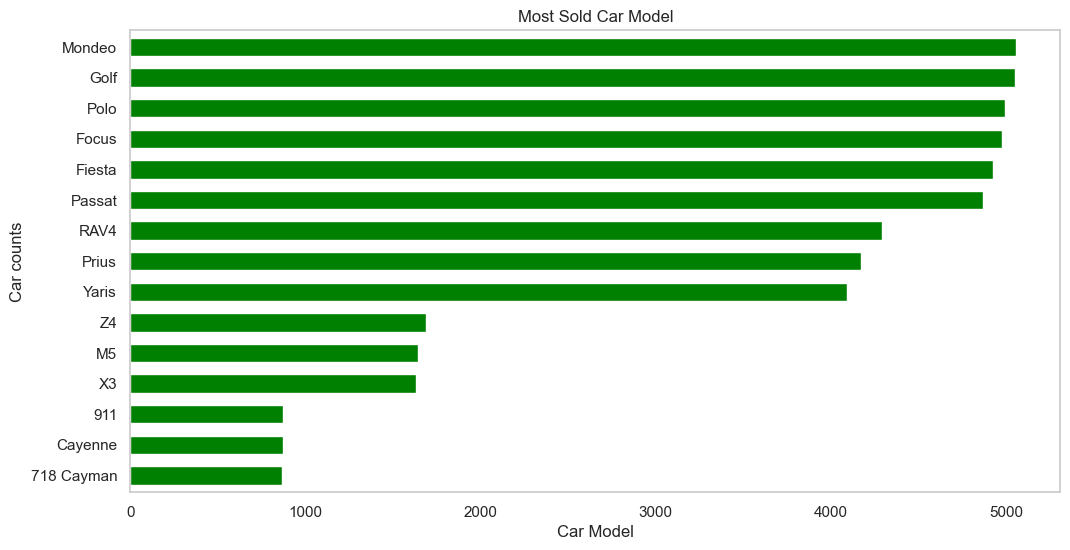

In [12]:
Most_sold_car_model = car_data["Model"].value_counts().sort_values(ascending=True)

Most_sold_car_model.plot(kind='barh', figsize=(12, 6), color = 'green', width = 0.6)
plt.grid(False)
plt.title("Most Sold Car Model")
plt.xlabel("Car Model")
plt.ylabel("Car counts")
plt.show()

In [17]:
pivot_price_table = car_data.pivot_table(values="Price", index="Model", columns="Manufacturer", aggfunc=np.mean).fillna(0)
print(pivot_price_table)

Manufacturer           BMW          Ford       Porsche        Toyota  \
Model                                                                  
718 Cayman        0.000000      0.000000  21527.666667      0.000000   
911               0.000000      0.000000  37024.724771      0.000000   
Cayenne           0.000000      0.000000  28714.568966      0.000000   
Fiesta            0.000000   7197.324873      0.000000      0.000000   
Focus             0.000000  11790.282757      0.000000      0.000000   
Golf              0.000000      0.000000      0.000000      0.000000   
M5            39911.110638      0.000000      0.000000      0.000000   
Mondeo            0.000000  12956.009292      0.000000      0.000000   
Passat            0.000000      0.000000      0.000000      0.000000   
Polo              0.000000      0.000000      0.000000      0.000000   
Prius             0.000000      0.000000      0.000000  14010.771038   
RAV4              0.000000      0.000000      0.000000  19433.17

C:\Users\user\AppData\Local\Temp\ipykernel_4956\3759007002.py:1: FutureWarning: The provided callable <function mean at 0x000001AE2AD66020> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_price_table = car_data.pivot_table(values="Price", index="Model", columns="Manufacturer", aggfunc=np.mean).fillna(0)


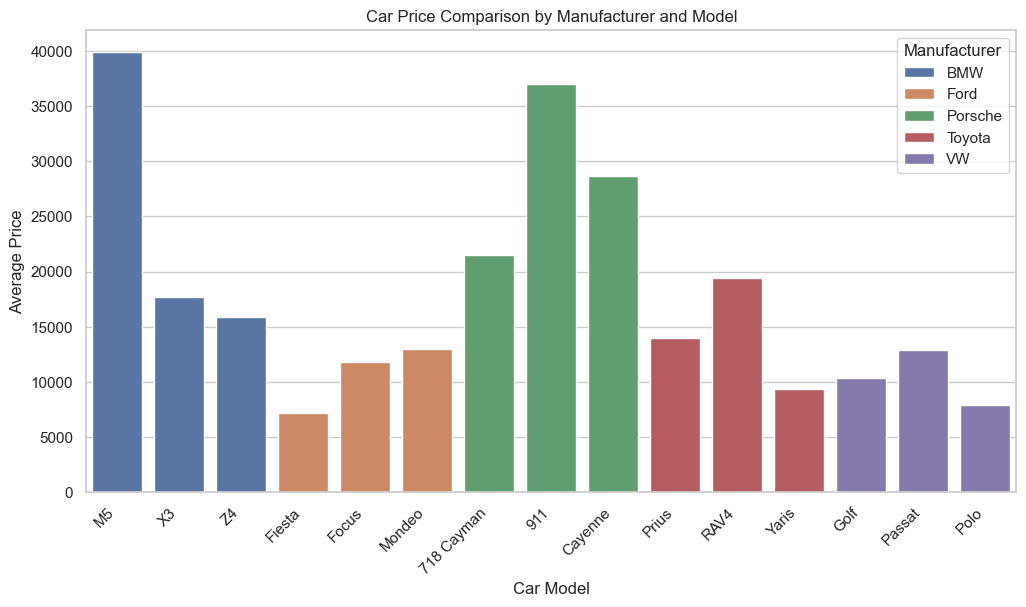

In [20]:
price_summary = car_data.groupby(["Manufacturer", "Model"])["Price"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=price_summary, x="Model", y="Price", hue="Manufacturer", errorbar=None)

plt.title("Car Price Comparison by Manufacturer and Model")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Price")
plt.xlabel("Car Model")
plt.show()

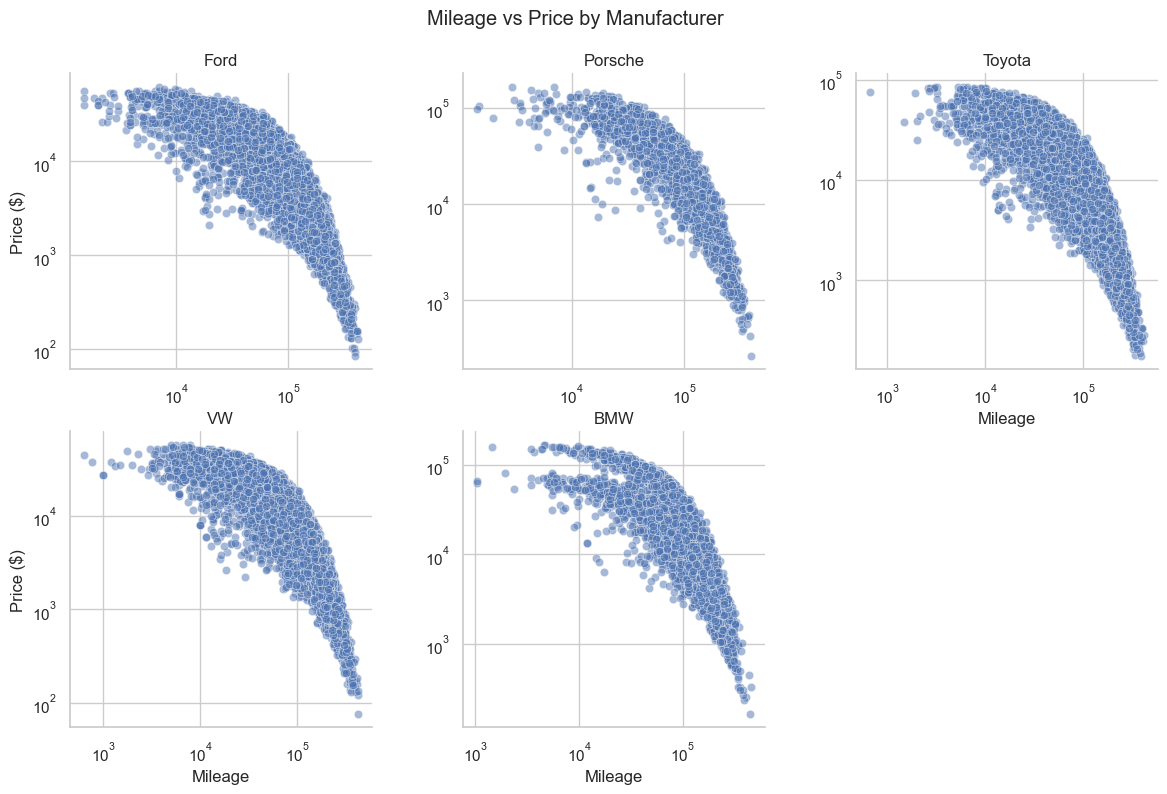

In [25]:
# scatter plot to show the relationship between Mileage and Price
g = sns.FacetGrid(car_data, col="Manufacturer", col_wrap=3, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x="Mileage", y="Price", alpha=0.5)
g.set(xscale="log", yscale="log")
g.set_axis_labels("Mileage", "Price ($)")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Mileage vs Price by Manufacturer")

plt.show()



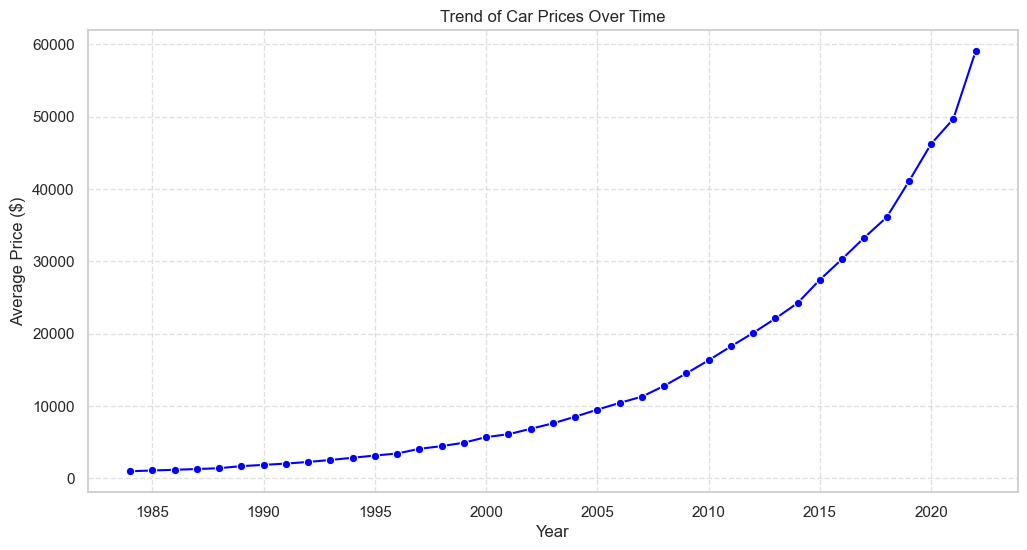

In [26]:
price_trend = car_data.groupby("Year of manufacture")["Price"].mean().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=price_trend, x="Year of manufacture", y="Price", marker="o", color="blue")

plt.title("Trend of Car Prices Over Time")
plt.xlabel("Year")
plt.ylabel("Average Price ($)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

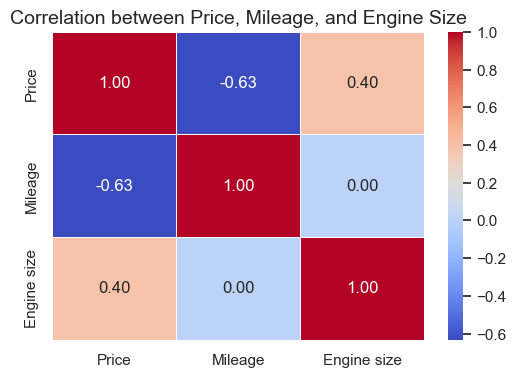

In [31]:
corr = car_data[['Price', 'Mileage', 'Engine size']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation between Price, Mileage, and Engine Size", fontsize=14)
plt.show()

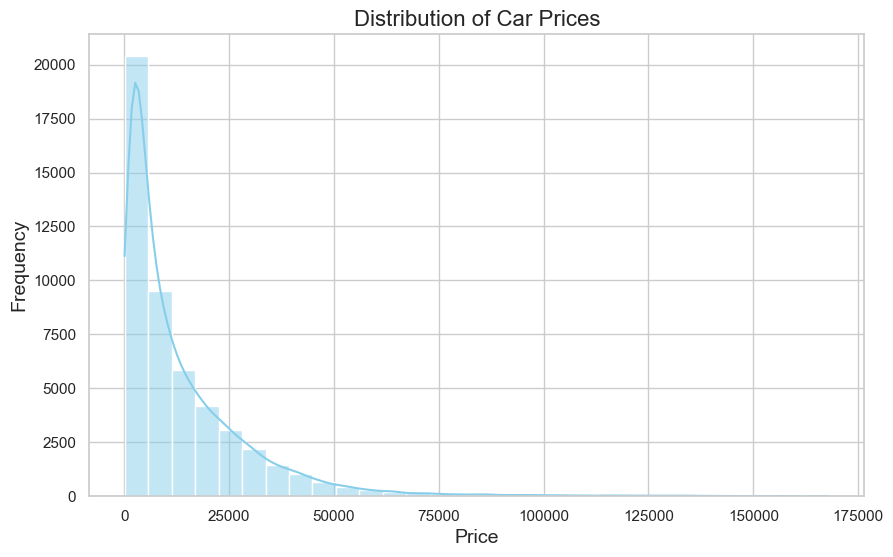

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(car_data['Price'], bins=30, kde=True, color="skyblue")

plt.title("Distribution of Car Prices", fontsize=16)
plt.xlabel("Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()
